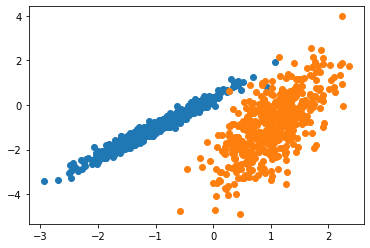

In [1]:
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot

# 定义数据集
x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,
                           random_state=4)
# 为每个类的样本创建散点图
for class_value in range(2):
    row_ix = where(y == class_value)
    pyplot.scatter(x[row_ix, 0], x[row_ix, 1])
pyplot.show()

k-means 聚类

<function matplotlib.pyplot.show(close=None, block=None)>

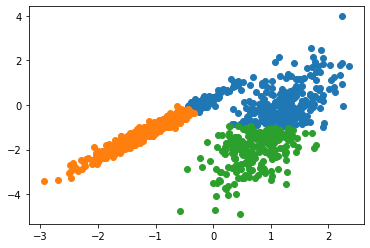

In [10]:
from numpy import unique
from sklearn.cluster import KMeans
x, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,
                           random_state=4)
# 定义模型
model = KMeans(n_clusters = 3)
# 匹配模型
model.fit(x)
# 为每个分配一个集群
yhat = model.predict(x)
# 检索唯一集群
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(x[row_ix,0], x[row_ix,1])
pyplot.show

高斯混合模型
总结了一个多变量概率密度函数，顾名思义就是混合了高斯概率分布

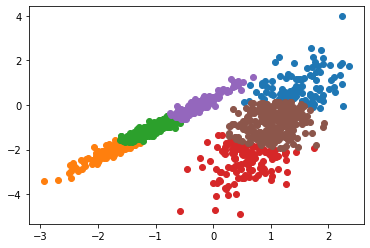

In [11]:
from sklearn.mixture import GaussianMixture
x, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,
                           random_state=4)
model = GaussianMixture(n_components=6)
yhat = model.fit_predict(x)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(x[row_ix, 0],x[row_ix, 1])
pyplot.show()

k-means 聚类算法思想
随机选择k个聚类中心,把集合里的元素与最近的聚类中心聚为一类，得到一次聚类，再把每一个类的均值作为新的聚类中心重新聚类，迭代n次得到结果
一、初始化聚类中心
首先随机选择集合里的一个元素作为第一个聚类中心放入容器，选择距离第一个聚类中心最远的一个元素作为第二个聚类中心放入容器，第三、四、、、N个同理，为了优化可以选择距离开方做为评判标准
二、迭代聚类
依次把集合里的元素与距离最近的聚类中心分为一类，放到对应该聚类中心的新的容器，一次聚类完成后求出新容器里个类的均值，对该类对应的聚类中心进行更新，再次进行聚类操作，迭代n次得到理想的结果
三、可视化展示
利用matplotlib.pyplot 对聚类后的元素显示（散点图）

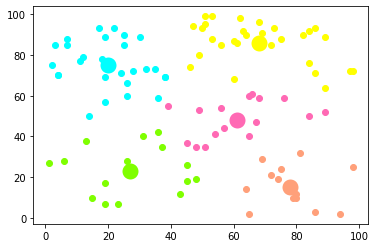

In [28]:
import numpy as np
import matplotlib.pyplot as plt
# 两点距离
def distance(e1, e2):
    return np.sqrt((e1[0] - e2[0])**2 + (e1[1] - e2[1])**2)
# 集合中心
def means(arr):
    return np.array([np.mean([e[0] for e in arr]), np.mean([e[1] for e in arr])])
# arr中距离a最远的元素，用于初始化聚类中心
def farthest(k_arr, arr):
    f = [0, 0]
    max_d = 0
    for e in arr:
        d = 0
        for i in range(k_arr.__len__()):
            d = d + np.sqrt(distance(k_arr[i], e))
        if d > max_d:
            max_d = d
            f = e
    return f

#arr中距离a最近的元素，用于聚类
def clossest(a, arr):
    c = arr[1]
    min_d = distance(a, arr[1])
    arr = arr[1:]
    for e in arr:
        d = distance(a, e)
        if d < min_d:
            min_d = d
            c = e
    return c

if __name__=="__main__":
    ## 生成二维随机坐标
    ## arr是一个数组，每个元素都是一个二元组，代表着一个坐标
    ## arr形如：[ (x1, y1), (x2, y2), (x3, y3) ... ]
    arr = np.random.randint(100, size=(100, 1, 2))[:, 0, :]
    ## 初始化聚类中心和聚类容器
    m = 5
    r = np.random.randint(arr.__len__() - 1)
    k_arr = np.array([arr[r]])
    cla_arr = [[]]
    for i in range(m-1):
        k = farthest(k_arr, arr)
        k_arr = np.concatenate([k_arr, np.array([k])])
        cla_arr.append([])
    
## 迭代聚类
    n = 20
    cla_temp = cla_arr
    for i in range(n):
        for e in arr:       # 把集合里每一个元素聚到最近的类
            ki = 0              # 假定距离第一个中心最近
            min_d = distance(e, k_arr[ki])
            for j in range(1, k_arr.__len__()):
                if distance(e, k_arr[j]) < min_d:      #找到更近的聚类中心
                    min_d = distance(e, k_arr[j])
                    ki = j
            cla_temp[ki].append(e)
    # 迭代更新聚类中心
        for k in  range(k_arr.__len__()):
            if n - 1 == i:
                break
            k_arr[k] = means(cla_temp[k])
            cla_temp[k] = []
# 可视化
    col = ['HotPink', 'Aqua', 'Chartreuse', 'yellow', 'LightSalmon']
    for i in range(m):
        plt.scatter(k_arr[i][0],k_arr[i][1], linewidth=10, color=col[i])
        plt.scatter([e[0] for e in cla_temp[i]], [e[1] for e in cla_temp[i]], color = col[i])
    plt.show()